In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import plotly.express as px


from typing import List, Tuple, Callable
from dataclasses import dataclass
import pandas as pd
import numpy as np
from functools import partial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import sys
sys.path.insert(0, "../")
from utils import *



In [2]:
# Load CSVs
standard_csv = Path("ising_model_sweep_data.csv")
qdrift_csv = Path("qdrift_ising_model_sweep_data2.csv")
qdrift_csv_more_random = Path("qdrift_ising_model_sweep_data_more_random.csv")

standard_qpe_df = pd.read_csv(standard_csv)
qdrift_qpe_df = pd.read_csv(qdrift_csv)
qdrift_qpe_df_more_random = pd.read_csv(qdrift_csv_more_random)

In [3]:

def error_upper_bound_worst_case(n, t: float, lam, N):

    return np.sqrt(n * t ** 2 * lam ** 2 / N)

def error_upper_bound_average_case(n, t: float, lam, N):
    return np.ceil((2 * lam ** 2 * t ** 2) / N)


def _get_info_box(df, true_eigenval):
    alpha = df["Alpha"].iloc[0] if "Alpha" in df.columns else "N/A"
    hamiltonian_type = df["type of Hamiltonian"].iloc[0] if "type of Hamiltonian" in df.columns else "N/A"
    seed = df["Seed"].iloc[0] if "Seed" in df.columns else "N/A"

    # Format table text as string
    table_str = (
        f"<b>True Eigenvalue:</b> {true_eigenval:.5f}<br>"
        f"<b>Alpha:</b> {alpha}<br>"
        f"<b>Hamiltonian:</b> {hamiltonian_type}<br>"
        f"<b>Seed:</b> {seed}"
    )
    return table_str

def plot_error_vs_time(df: pd.DataFrame, title_suffix, true_eigenval):
    fig_scatter = px.scatter(
        df,
        x="Time",
        y="Eigenvalue Error",
        color="Num Ancilla",
        title=f"Eigenvalue Error vs Time (Scatter Plot) {title_suffix}",
        labels={"Eigenvalue Error": "Error", "Num Qubits": "# Qubits"},
    )


    # Add info box
    fig_scatter.add_annotation(
        text=_get_info_box(df, true_eigenval),
        xref="paper",
        yref="paper",
        x=1.02,  # just to the right of the plot
        y=1.3,
        showarrow=False,
        align="left",
        bordercolor="#1f77b4",
        borderwidth=2,
        bgcolor="#f5f5f5",
        font=dict(size=12),
    )

    fig_scatter.update_layout(
        xaxis_title="Simulation Time",
        yaxis_title="Eigenvalue Estimation Error",
        legend_title="Number of Ancilla Qubits",
        margin=dict(r=120)  # extra space for info box
    )

    fig_scatter.show()

def loglog_error_vs_time(df: pd.DataFrame, title_suffix, true_eigenval):
    fig_loglog = px.scatter(
        df,
        x="Time",
        y="Eigenvalue Error",
        color="Num Ancilla",
        log_x=True,
        log_y=True,
        title=f"Eigenvalue Error vs Time (Log-Log Plot) {title_suffix}",
        labels={"Eigenvalue Error": "Error", "Num Qubits": "# Qubits"},
    )

    fig_loglog.add_annotation(
        text=_get_info_box(df, true_eigenval),
        xref="paper",
        yref="paper",
        x=1.02,
        y=1.3,
        showarrow=False,
        align="left",
        bordercolor="#2ca02c",
        borderwidth=2,
        bgcolor="#f0fff0",
        font=dict(size=12),
    )

    fig_loglog.update_layout(
        xaxis_title="Simulation Time (log)",
        yaxis_title="Eigenvalue Estimation Error (log)",
        legend_title="Number of Ancilla Qubits",
        margin=dict(r=120)
    )

    fig_loglog.show()
def plot_error_vs_ancilla(df: pd.DataFrame, title_suffix=""):
    fig = px.box(
        df,
        x="Num Ancilla",
        y="Eigenvalue Error",
        points="all",
        title=f"Error vs Number of Ancilla Qubits {title_suffix}",
        labels={"Num Ancilla": "# Ancilla Qubits", "Eigenvalue Error": "Eigenvalue Estimation Error"},
    )
    fig.show()

def plot_3d_relationship(df: pd.DataFrame, title_suffix=""):
    fig = px.scatter_3d(
        df,
        x="Time",
        y="Num Ancilla",
        z="Eigenvalue Error",
        color="Eigenvalue Error",
        title=f"3D Plot of Error vs Time vs Ancilla Qubits {title_suffix}",
        labels={"Time": "Simulation Time", "Num Ancilla": "# Ancilla Qubits", "Eigenvalue Error": "Error"},
    )
    fig.show()


In [4]:
# lets start with standard qpe
exact_eigenvalue = 2.4
plot_error_vs_time(standard_qpe_df, "Standard QPE", exact_eigenvalue)

In [5]:
# now qdrift qpe
exponential_invocations = qdrift_qpe_df[qdrift_qpe_df["QDRIFT Implementation"] == "exponential invocations of qdrift channel"]
plot_error_vs_time(exponential_invocations, "qDRIFT-QPE: exponential invocations of qDRIFT channel", exact_eigenvalue)

In [6]:
linear_invocations = qdrift_qpe_df[qdrift_qpe_df["QDRIFT Implementation"] == "linear invocations of qdrift channel"]
plot_error_vs_time(linear_invocations, "qDRIFT-QPE: linear invocations of qDRIFT channel", exact_eigenvalue)

In [7]:
loglog_error_vs_time(exponential_invocations, "qDRIFT-QPE: exponential invocations of qdrift channel", exact_eigenvalue)

In [8]:
exact_eigenvalue = 2.4
exponential_invocations_more_random = qdrift_qpe_df_more_random[qdrift_qpe_df_more_random["QDRIFT Implementation"] == "exponential invocations of qdrift channel"]
plot_error_vs_time(exponential_invocations_more_random, "qDRIFT-QPE: exponential invocations of qdrift channel (more random)", exact_eigenvalue)

In [9]:
linear_invocations_more_random = qdrift_qpe_df_more_random[qdrift_qpe_df_more_random["QDRIFT Implementation"] == "linear invocations of qdrift channel"]
plot_error_vs_time(linear_invocations_more_random, "qDRIFT-QPE: linear invocations of qdrift channel (more random)", exact_eigenvalue)
loglog_error_vs_time(exponential_invocations_more_random, "qDRIFT-QPE: exponential invocations of qdrift channel (more random)", exact_eigenvalue)

# New experiments:
let $s$ be the number of times a given quantum circuit is executed. Let 
- instead of generating one random QPE circuit, and measuring it $s$ times, 
  we generate $s$ random QPE circuits, and measure each of them once. Test $s=1024$.
  - Also perfrorm every other test with the usual $s=1$.
- Test simpler Hamiltoninan $Z \otimes Z$
- change the distance between times from linear to logarithmic
- test two different time ranges: $[0, 1]$ and $[0, 0.1]$


In [10]:
qdrift_qpe_df_other_parameters = pd.read_csv("qdrift_ising_model_sweep_data_all_2025-06-05.csv")
expected_eigenvalue = 3.1240998703626572
for group in qdrift_qpe_df_other_parameters.groupby("Num Random Circuits"):
    num_random_circuits, group_df = group
    title_suffix = f"qDRIFT-QPE: {num_random_circuits} random circuits"
    smallest_error = group_df["Eigenvalue Error"].min()
    mean_error = group_df["Eigenvalue Error"].mean()
    stdev_error = group_df["Eigenvalue Error"].std()
    print(f"Num Random Circuits: {num_random_circuits}, Smallest Error: {smallest_error}, Mean Error: {mean_error}, Std Dev Error: {stdev_error}")
    plot_error_vs_time(group_df, title_suffix, expected_eigenvalue)


Num Random Circuits: 1, Smallest Error: 0.0010910339196947, Mean Error: 1.0771790073624579, Std Dev Error: 1.2283324549823527


Num Random Circuits: 1024, Smallest Error: 0.0023400833859725, Mean Error: 1.7360270759635847, Std Dev Error: 1.3589036944826907


New exp: run usual $s=1$ to generate $\tilde{\lambda}$, but perform triplicate and avergate results to get $\bar{\tilde{\lambda}}$

In [11]:
replicate_1_df = qdrift_qpe_df_other_parameters[qdrift_qpe_df_other_parameters["Num Random Circuits"] == 1]
replicate_2_df = pd.read_csv("replicate2_qdrift_ising_model_sweep_data_all_2025-06-11.csv")
replicate_3_df = pd.read_csv("replicate2_qdrift_ising_model_sweep_data_all_2025-06-11.csv")

plot_error_vs_time(replicate_1_df, "qDRIFT-QPE: replicate 1", expected_eigenvalue)
plot_error_vs_time(replicate_2_df, "qDRIFT-QPE: replicate 2", expected_eigenvalue)
plot_error_vs_time(replicate_3_df, "qDRIFT-QPE: replicate 3", expected_eigenvalue)

# now average and get error bars. Aggregate the data by Num Ancilla and Time
def aggregate_data(df: pd.DataFrame):
    return df.groupby(["Num Ancilla", "Time"]).agg(
        Mean_Error=("Eigenvalue Error", "mean"),
        Std_Dev_Error=("Eigenvalue Error", "std"),
        Min_Error=("Eigenvalue Error", "min"),
        Max_Error=("Eigenvalue Error", "max")
    ).reset_index()

aggregated_df = aggregate_data(pd.concat([replicate_1_df, replicate_2_df, replicate_3_df]))

# Plot the aggregated data with error bars
def plot_aggregated_error_vs_time(df: pd.DataFrame, title_suffix=""):
    fig = px.line(
        df,
        x="Time",
        y="Mean_Error",
        color="Num Ancilla",
        error_y="Std_Dev_Error",
        title=f"Aggregated Eigenvalue Error vs Time {title_suffix}",
        labels={"Mean_Error": "Mean Error", "Num Ancilla": "# Ancilla Qubits"},
    )
    fig.update_traces(mode='markers+lines')
    fig.add_hline(y=expected_eigenvalue, line_dash="dash", line_color="red", annotation_text="Magnitude of True Eigenvalue", annotation_position="top left")
    fig.update_layout(
        xaxis_title="Simulation Time",
        yaxis_title="Eigenvalue Estimation Error",
        legend_title="Number of Ancilla Qubits",
    )
    fig.show()
plot_aggregated_error_vs_time(aggregated_df, "qDRIFT-QPE: aggregated data from 3 replicates")



Hamiltonian Type: Ising, Smallest Error: 4.241103193969309e-06, Mean Error: 1.4583942735683968, Std Dev Error: 1.7122008995697293


/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



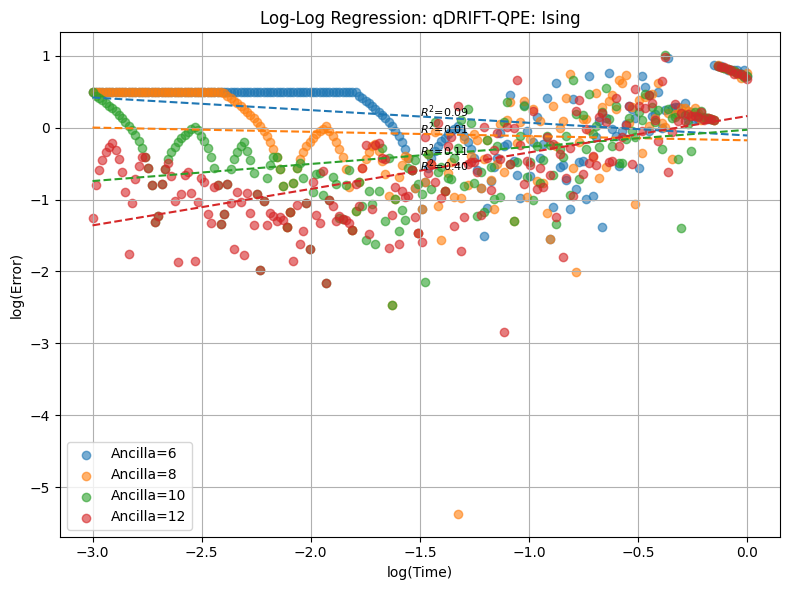

Hamiltonian Type: Simple Z, Smallest Error: 4.907440543266972e-06, Mean Error: 0.34324961950139765, Std Dev Error: 0.42695326133381756


/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



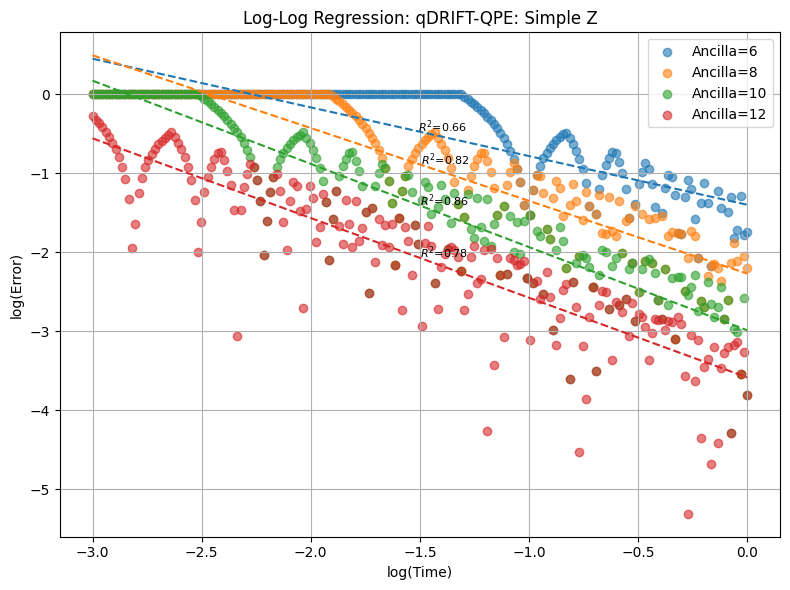

In [12]:
larger_time_df = pd.read_csv("qdrift_ising_model_sweep_data_all_2025-06-10.csv")
# importy the lib needed to parse strings as python objects
import ast
# now let's group by type of Hamiltonian
for hamiltonian_type, group_df in larger_time_df.groupby("type of Hamiltonian"):
    title_suffix = f"qDRIFT-QPE: {hamiltonian_type}"
    smallest_error = group_df["Eigenvalue Error"].min()
    mean_error = group_df["Eigenvalue Error"].mean()
    stdev_error = group_df["Eigenvalue Error"].std()
    print(f"Hamiltonian Type: {hamiltonian_type}, Smallest Error: {smallest_error}, Mean Error: {mean_error}, Std Dev Error: {stdev_error}")
    expected_eigenvalue = ast.literal_eval(group_df["Exact Eigenvalue"].iloc[0]).real
    plot_error_vs_time(group_df, title_suffix, expected_eigenvalue)
    loglog_error_vs_time(group_df, title_suffix, expected_eigenvalue)
    loglog_error_vs_time_with_regression(group_df, title_suffix, expected_eigenvalue)

Log log plot time
- 3 replicates of $t \in [0, 0.1]$
- 1 replicate of $t \in [0, 1]$

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



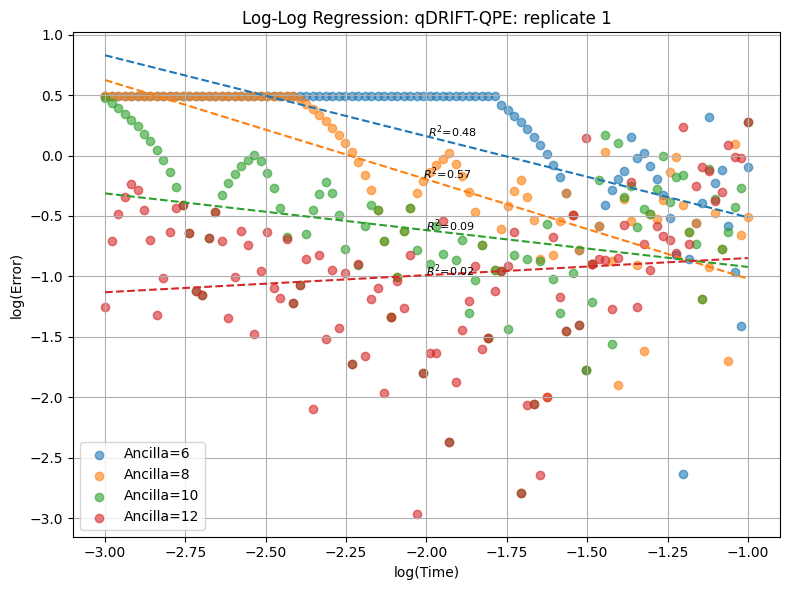

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



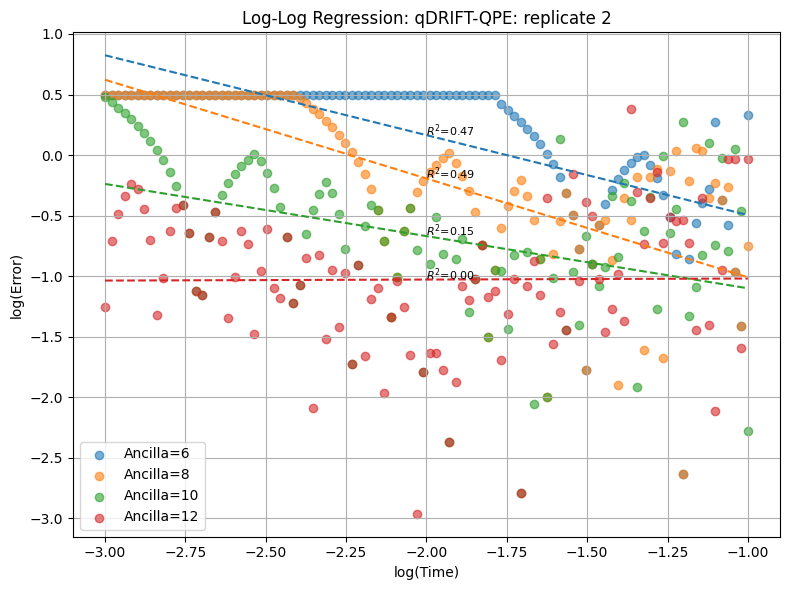

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



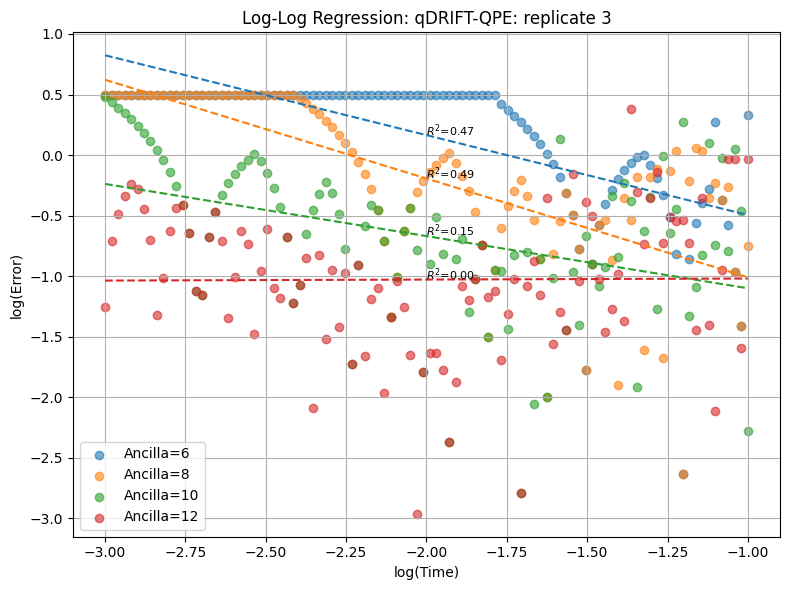

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



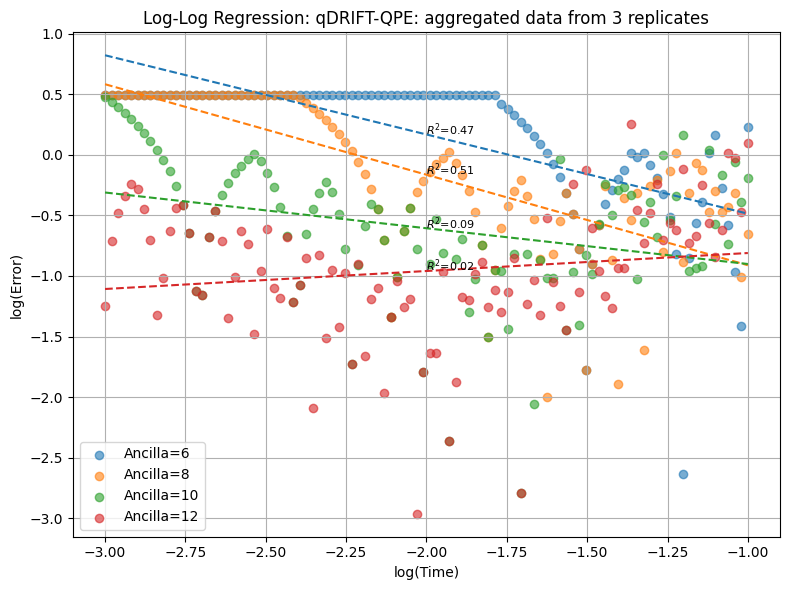

{6: 0.4698285984531555,
 8: 0.5074957898858444,
 10: 0.08848771544387013,
 12: 0.024374632294889342}

In [13]:
loglog_error_vs_time_with_regression(df=replicate_1_df, title_suffix="qDRIFT-QPE: replicate 1", true_eigenval=expected_eigenvalue)
loglog_error_vs_time_with_regression(df=replicate_2_df, title_suffix="qDRIFT-QPE: replicate 2", true_eigenval=expected_eigenvalue)
loglog_error_vs_time_with_regression(df=replicate_3_df, title_suffix="qDRIFT-QPE: replicate 3", true_eigenval=expected_eigenvalue)

# now the aggregated data
loglog_error_vs_time_with_regression(df=aggregated_df, title_suffix="qDRIFT-QPE: aggregated data from 3 replicates", true_eigenval=expected_eigenvalue, agg=True)

loglog plot of simple Z gate case

# What if we look at a larger time frame?

In [14]:
import pandas as pd
just_tryng_some_bs = pd.read_csv("qdrift_ising_model_sweep_ultimate_2025-06-14.csv")
expected_eigenvalue = 2.561249694973137
plot_error_vs_time(just_tryng_some_bs, "qDRIFT-QPE: just trying something", expected_eigenvalue)
loglog_error_vs_time(just_tryng_some_bs, "qDRIFT-QPE: just trying something", expected_eigenvalue)

In [15]:
just_tryng_some_bs2 = pd.read_csv("qdrift_ising_model_sweep_ultimate_2025-06-15.csv")
print(len(just_tryng_some_bs2))
loglog_error_vs_time(just_tryng_some_bs2, "qDRIFT-QPE: just trying something 2", expected_eigenvalue)
plot_error_vs_time(
    df=just_tryng_some_bs2,
    title_suffix="qDRIFT-QPE: just trying something 2",
    true_eigenval=expected_eigenvalue
)

399


## Post-process data: compute summary statistics of measurement results for each "experimental condition"

## Note on "Time":
For a Hamiltonian $H$ s.t. 

$$H = \sum_{j=0}^{L-1} h_j H_j$$

We define the qDRIFT quantum channel $\varepsilon$ as

$$\varepsilon(\rho) = \sum_j p_j e^{i\tau H_j}\rho e^{-i\tau H_j}$$

Where $\tau = \frac{t\lambda}{N}$ and $N$ is the number of samples from $\varepsilon$ *per invocation* of $\varepsilon$.

Hereinafter, "Time" will refer to $t$. 

So, "Time" is *not* the "effective qDRIFT timestep" $\tau$. 

"Time" is also *not* the total simulation time in our QPE circuit. That would be more like 

$$\sum_{k = 0}^{num ancilla - 1} t^{2^k}$$


In [16]:
import pathlib
import re
from post_processing_utils import STAT_FUNS, read_experiment_csv


def counts_to_evals(counts: dict,
                    num_ancilla: int,
                    time: float) -> np.ndarray:
    """
    Turn the summary frequency dictionary into a flat numpy array. It does so by "unpacking" the dictionary. 
    For example, {"result a":5, "results b":2,...} turns to [a,a,a,a,a,b,b]
    Note: we assume counts already come as dict, not just strings
    """
    # convert bit-strings → decimal vectorised
    bit_strings = np.array(list(counts.keys()))
    shots       = np.fromiter(counts.values(), int) # i.e. the number of times each bit-string was measured

    decimals = np.array([int(b, 2) for b in bit_strings]) / 2**num_ancilla

    phases = np.where(decimals >= .5, decimals - 1.0, decimals)
    energies = 2 * np.pi  * phases / time          # E = 2π·phase / t

    # replicate according to shot counts and return as 1-D array
    return np.repeat(energies, shots)

def add_eigenvalue_stats(
        df: pd.DataFrame,
        raw_col         = "Raw results",
        num_ancilla_col = "Num Ancilla",
        time_col        = "Time",
        prefix          = "Eigenvalue") -> pd.DataFrame:
    """
    For every row turn `raw_col` (a count-dict) into the flat eigenvalue list,
    compute statistics defined in STAT_FUNS, and add them as *new* columns to
    the same DataFrame. Also mutates in-place.
    """
    # allocate one empty list per statistic to fill row-by-row
    buffers = {name: [] for name in STAT_FUNS}

    for _, row in df.iterrows():
        evals = counts_to_evals(row[raw_col],
                                row[num_ancilla_col],
                                row[time_col])
        for stat_name, func in STAT_FUNS.items():
            buffers[stat_name].append(func(evals))

    # copy buffers into the DataFrame
    for stat_name, values in buffers.items():
        df[f"{prefix}_{stat_name}"] = values

    return df

raw_df = read_experiment_csv("qdrift_ising_model_sweep_ultimate_2025-06-15.csv")
add_eigenvalue_stats(raw_df)          # adds Eigenvalue_mean, _std, _median, …

,Num Qubits,Time,Shots,Num Ancilla,Exact Eigenvalue,Expected Phase,Most Probable Bitstring,Estimated Phase,Estimated Eigenvalue,Eigenvalue Error,...,Num Shots per Circuit,Circuit Depth,Raw results,Eigenvalue_mean,Eigenvalue_std,Eigenvalue_median,Eigenvalue_q25,Eigenvalue_q75,Eigenvalue_min,Eigenvalue_max
0,2,0.001000,1024,12,2.56125+0.00000j,0.000408,10,0.000488,3.067962,0.506712,...,1024,4098,"{'000000000010': 712, '000001000110': 1, '0000...",2.736897,9.036240,3.067962,3.067962,3.067962,-107.378655,179.475752
1,2,0.006080,1024,12,2.56125+0.00000j,0.002479,1010,0.002441,2.522902,0.038348,...,1024,4098,"{'000000001001': 114, '000000001010': 573, '00...",2.689453,12.200160,2.522902,2.522902,2.522902,-229.331761,302.748199
2,2,0.002002,1024,12,2.56125+0.00000j,0.000816,11,0.000732,2.298442,0.262807,...,1024,4098,"{'111111101101': 2, '111010110110': 1, '111111...",1.973728,9.464012,2.298442,2.298442,3.064590,-252.828671,70.485569
3,2,0.001383,1024,12,2.56125+0.00000j,0.000564,10,0.000488,2.218944,0.342305,...,1024,4098,"{'111111111011': 2, '000000000010': 721, '0000...",4.100930,61.068667,2.218944,2.218944,2.218944,-85.429355,1953.780446
4,2,0.002899,1024,12,2.56125+0.00000j,0.001182,101,0.001221,2.645321,0.084071,...,1024,4098,"{'000000000100': 55, '000000000101': 873, '000...",2.576088,1.446302,2.645321,2.645321,2.645321,-19.575375,17.459118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2,23.317220,1024,10,2.56125+0.00000j,0.504928,111011110,0.466797,0.125786,2.435464,...,1024,1026,"{'0111011010': 10, '1000000110': 1, '100001111...",0.064010,0.079579,0.095392,0.038420,0.123154,-0.134206,0.133943
395,2,32.141838,1024,10,2.56125+0.00000j,0.102156,110111011,0.432617,0.084569,2.476680,...,1024,1026,"{'1011001001': 1, '1101001001': 2, '0101001100...",0.035457,0.065752,0.065670,-0.002577,0.081706,-0.097551,0.097551
396,2,39.810717,1024,8,2.56125+0.00000j,0.228264,11010101,-0.167969,-0.026510,2.587760,...,1024,258,"{'00110011': 1, '00101101': 5, '11001100': 2, ...",-0.013622,0.031514,-0.022811,-0.028976,-0.003699,-0.078297,0.078297
397,2,39.810717,1024,10,2.56125+0.00000j,0.228264,1101011100,-0.160156,-0.025277,2.586527,...,1024,1026,"{'0110010100': 1, '1010100111': 9, '1101000001...",-0.022800,0.032580,-0.026510,-0.050862,-0.023427,-0.075831,0.075368


In [32]:
def qdrift_qpe_error_upper_bound(time: float, num_ancilla: int, lam: float, N: int) -> float:
    """
    Calculate the error upper bound for qDRIFT-QPE based on the number of ancilla qubits,
    simulation time, and other parameters.
    """
    epsilon = 2 ** (num_ancilla - 1) * lam**2 * time**2 / N
    return epsilon
raw_df["Upper Bound"] = raw_df.apply(
    lambda row: qdrift_qpe_error_upper_bound(
        time=row["Time"],
        num_ancilla=row["Num Ancilla"],
        lam=row["Alpha"],
        N=row["Num Shots per Circuit"]
    ), axis=1)

raw_df = raw_df[raw_df["Num Ancilla"]==12]
px.scatter(raw_df, x="Time", y="Eigenvalue_std", color="Num Ancilla")\
    .add_scatter(x=raw_df["Time"], y=raw_df["Upper Bound"], mode="lines", name="Upper Bound", line=dict(dash="dash", color="red"))

/var/folders/t7/fs05qlp5227_wpg4jmr00_mc0000gn/T/ipykernel_1527/449239879.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
import ast
df = pd.read_csv("qdrift_ising_model_sweep_ultimate_2025-06-19.csv")
results = {}
for i, row in df.iterrows():
    n = row["Num Ancilla"]
    t = row["Time"]
    print(f"({n}, {t})")
    results[(n, t)] = ast.literal_eval(row["Raw results"])

len(results)


(8, 0.001)
(10, 0.0084975343590864)
(10, 0.0376493580679246)
(10, 0.0178864952905743)
(10, 0.0019179102616724)
(10, 0.0040370172585965)
(8, 0.0093260334688322)
(8, 0.0413201240011533)
(10, 0.001)
(8, 0.0196304065004027)
(8, 0.002104904144512)
(8, 0.0044306214575838)
(8, 0.001097498765493)
(10, 0.0093260334688322)
(10, 0.0044306214575838)
(10, 0.0413201240011533)
(10, 0.002104904144512)
(10, 0.0196304065004027)
(10, 0.001097498765493)
(8, 0.0102353102189902)
(8, 0.0048626015800653)
(8, 0.0453487850812858)
(8, 0.0023101297000831)
(8, 0.0215443469003188)
(8, 0.0012045035402587)
(10, 0.0048626015800653)
(10, 0.0102353102189902)
(10, 0.0023101297000831)
(10, 0.0453487850812858)
(8, 0.0053366992312063)
(10, 0.0215443469003188)
(8, 0.0112332403297802)
(10, 0.0012045035402587)
(8, 0.0025353644939701)
(8, 0.0497702356433211)
(8, 0.023644894126454)
(8, 0.001321941148466)
(10, 0.0053366992312063)
(10, 0.0112332403297802)
(10, 0.0497702356433211)
(10, 0.0025353644939701)
(8, 0.0058570208180566)
(8

200

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact, Dropdown

def interactive_qpe_histograms(results, normalize=True):
    # Extract sorted time and ancilla values
    times = sorted({t for (_, t) in results})
    ns = sorted({n for (n, _) in results})
    print(ns)

    @interact(t=Dropdown(options=times, description='Time'))
    def update_plot(t):
        fig = make_subplots(
            rows=len(ns), cols=1,
            shared_xaxes=True,
            subplot_titles=[f"Ancilla Qubits: n = {n}" for n in ns]
        )
        for row_idx, n in enumerate(ns, start=1):
            key = (n, t)
            if key not in results:
                continue

            counts = results[key]
            total = sum(counts.values())
            x = list(counts.keys())
            y = [counts[k] / total if normalize else counts[k] for k in x]

            fig.add_trace(go.Bar(
                x=x,
                y=y,
                name=f"n={n}",
                marker_color='blue',
                opacity=0.7,
                showlegend=False
            ), row=row_idx, col=1)

        fig.show()


interactive_qpe_histograms(results)


[8, 10]


interactive(children=(Dropdown(description='Time', options=(0.001, 0.001097498765493, 0.0012045035402587, 0.00…

In [20]:

T = Tuple[float, float, int]  # (x, y, original_index)

@dataclass
class RecursiveInfo:
    max_overall: float
    max_overall_slice: List[T]
    max_prefix: float
    max_prefix_slice: List[T]
    max_suffix: float
    max_suffix_slice: List[T]
    full_slice: List[T]


def dataframe_to_point_search_space_with_index(
    df: pd.DataFrame,
    x_col: str,
    y_col: str,
    sort_by_y: bool = True
) -> List[T]:
    points = [(row[x_col], row[y_col], idx) for idx, row in df.iterrows()]
    return sorted(points, key=lambda pt: pt[1]) if sort_by_y else points


def r2_of_points(points: List[T]) -> float:
    if len(points) < 2:
        return float('-inf')
    X = np.array([[x] for x, _, _ in points])
    y = np.array([y for _, y, _ in points])
    model = LinearRegression().fit(X, y)
    return r2_score(y, model.predict(X))


def base_case_eval_r2(search_space: List[T], min_length: int) -> RecursiveInfo:
    if len(search_space) < min_length:
        return RecursiveInfo(float('-inf'), [], float('-inf'), [], float('-inf'), [], search_space)
    val = r2_of_points(search_space)
    return RecursiveInfo(val, search_space, val, search_space, val, search_space, search_space)


def combine_r2_infos(left: RecursiveInfo, right: RecursiveInfo, min_length: int) -> RecursiveInfo:
    full = left.full_slice + right.full_slice

    cross = left.max_suffix_slice + right.max_prefix_slice
    cross_val = r2_of_points(cross) if len(cross) >= min_length else float('-inf')

    options = [
        (left.max_overall, left.max_overall_slice),
        (right.max_overall, right.max_overall_slice),
        (cross_val, cross)
    ]
    max_val, max_slice = max(options, key=lambda t: t[0])

    # Max prefix
    best_prefix, best_prefix_val = [], float('-inf')
    for i in range(min_length, len(full) + 1):
        segment = full[:i]
        val = r2_of_points(segment)
        if val > best_prefix_val:
            best_prefix_val = val
            best_prefix = segment

    # Max suffix
    best_suffix, best_suffix_val = [], float('-inf')
    for i in range(len(full) - min_length + 1):
        segment = full[i:]
        val = r2_of_points(segment)
        if val > best_suffix_val:
            best_suffix_val = val
            best_suffix = segment

    return RecursiveInfo(max_val, max_slice, best_prefix_val, best_prefix, best_suffix_val, best_suffix, full)


def generalized_max_substructure(
    search_space: List[T],
    partition_fn: Callable[[List[T]], Tuple[List[T], List[T]]],
    base_case_fn: Callable[[List[T]], bool],
    base_case_eval_fn: Callable[[List[T]], RecursiveInfo],
    combine_fn: Callable[[RecursiveInfo, RecursiveInfo], RecursiveInfo]
) -> RecursiveInfo:
    if base_case_fn(search_space):
        return base_case_eval_fn(search_space)

    left, right = partition_fn(search_space)
    left_info = generalized_max_substructure(left, partition_fn, base_case_fn, base_case_eval_fn, combine_fn)
    right_info = generalized_max_substructure(right, partition_fn, base_case_fn, base_case_eval_fn, combine_fn)
    return combine_fn(left_info, right_info)


def partition_by_y(points: List[T]) -> Tuple[List[T], List[T]]:
    mid = len(points) // 2
    return points[:mid], points[mid:]


def search_with_df_projection(
    df: pd.DataFrame,
    x_col: str,
    y_col: str,
    min_length: int = 3,
    sort_by_y: bool = True
) -> Tuple[pd.DataFrame, float, List[Tuple[float, float]]]:
    """
    Returns a tuple: (best_sub_dataframe, best_score, [(x, y), ...])
    """
    search_space = dataframe_to_point_search_space_with_index(df, x_col, y_col, sort_by_y)

    result = generalized_max_substructure(
        search_space=search_space,
        partition_fn=partition_by_y,
        base_case_fn=lambda s: len(s) <= 2 * min_length,
        base_case_eval_fn=partial(base_case_eval_r2, min_length=min_length),
        combine_fn=partial(combine_r2_infos, min_length=min_length)
    )

    indices = [idx for _, _, idx in result.max_overall_slice]
    best_df = df.loc[indices].sort_index()
    xy_projection = [(x, y) for x, y, _ in result.max_overall_slice]
    return best_df, result.max_overall, xy_projection


In [21]:
just_tryng_some_bs2["Log Time"] = np.log10(just_tryng_some_bs2["Time"])
just_tryng_some_bs2["Log Eigenvalue Error"] = np.log10(just_tryng_some_bs2["Eigenvalue Error"])
just_tryng_some_bs2_sorted = just_tryng_some_bs2.sort_values("Time").reset_index()

bestest_r2 = - np.inf

for m in range(15, len(just_tryng_some_bs2)):
    best_df, best_r2, best_xy = search_with_df_projection(
        just_tryng_some_bs2_sorted,
        x_col="Log Time",
        y_col="Log Eigenvalue Error",
        min_length=m, sort_by_y=False
    )
    if best_r2 >= bestest_r2:
        print(f"prev best r2: {bestest_r2}, new best r2: {best_r2}")
        bestest_r2 = best_r2
        bestest_df = best_df

prev best r2: -inf, new best r2: 0.4763277124548464
prev best r2: 0.4763277124548464, new best r2: 0.4763277124548464
prev best r2: 0.4763277124548464, new best r2: 0.4763277124548464
prev best r2: 0.4763277124548464, new best r2: 0.4763277124548464
prev best r2: 0.4763277124548464, new best r2: 0.4763277124548464
prev best r2: 0.4763277124548464, new best r2: 0.4763277124548464
prev best r2: 0.4763277124548464, new best r2: 0.4763277124548464
prev best r2: 0.4763277124548464, new best r2: 0.48421832629611883
prev best r2: 0.48421832629611883, new best r2: 0.4913155379043411
prev best r2: 0.4913155379043411, new best r2: 0.4931752308238765
prev best r2: 0.4931752308238765, new best r2: 0.5735009412492721
prev best r2: 0.5735009412492721, new best r2: 0.5735009412492721
prev best r2: 0.5735009412492721, new best r2: 0.5735009412492721
prev best r2: 0.5735009412492721, new best r2: 0.5735009412492721
prev best r2: 0.5735009412492721, new best r2: 0.5735009412492721
prev best r2: 0.573500

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/opt/anaconda3/envs/quantum_stuff/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



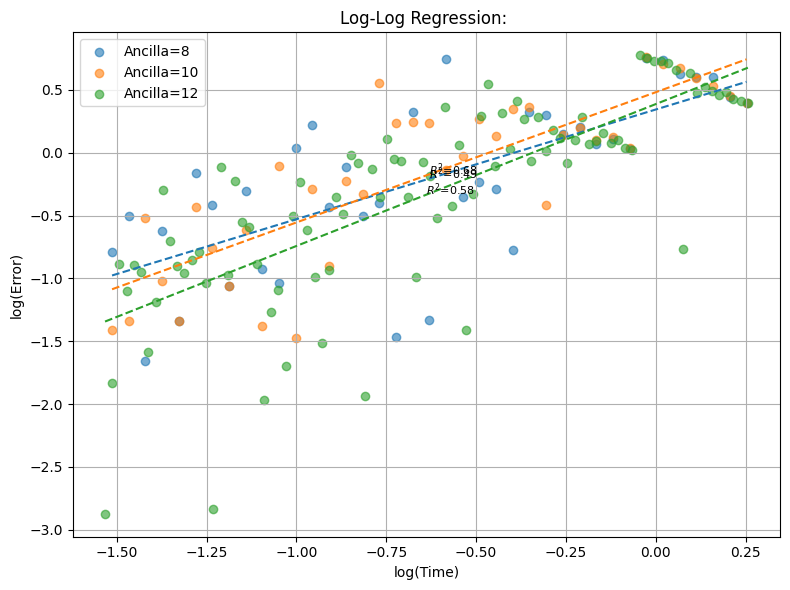

In [22]:
loglog_error_vs_time_with_regression(bestest_df, "")
loglog_error_vs_time(bestest_df, "", expected_eigenvalue)
plot_error_vs_time(bestest_df, "",  true_eigenval=2.561249694973137)

In [23]:
plot_error_vs_time(bestest_df, "", true_eigenval=2.561249694973137)

In [24]:
bestest_df

,index,Num Qubits,Time,Shots,Num Ancilla,Exact Eigenvalue,Expected Phase,Most Probable Bitstring,Estimated Phase,Estimated Eigenvalue,Eigenvalue Error,Alpha,QDRIFT Implementation,type of Hamiltonian,Num Random Circuits,Num Shots per Circuit,Circuit Depth,Raw results,Log Time,Log Eigenvalue Error
137,80,2,0.029332,1024,12,(2.561249694973137+0j),0.011957,110001,0.011963,2.562591,0.001341,3.6,exponential invocations of qdrift channel,Ising,1,1024,4098,"{'111111010010': 6, '000010011010': 2, '001000...",-1.532663,-2.872433
138,287,2,0.030681,1024,10,(2.561249694973137+0j),0.012507,1101,0.012695,2.599888,0.038638,3.6,exponential invocations of qdrift channel,Ising,1,1024,1026,"{'1111011101': 1, '0000000011': 33, '000100010...",-1.513131,-1.412986
139,283,2,0.030681,1024,8,(2.561249694973137+0j),0.012507,11,0.011719,2.399896,0.161353,3.6,exponential invocations of qdrift channel,Ising,1,1024,258,"{'00000001': 29, '11100110': 1, '11001101': 1,...",-1.513131,-0.792222
140,86,2,0.030721,1024,12,(2.561249694973137+0j),0.012523,110011,0.012451,2.546554,0.014696,3.6,exponential invocations of qdrift channel,Ising,1,1024,4098,"{'000000110011': 366, '000000101101': 19, '000...",-1.512563,-1.832813
141,92,2,0.032176,1024,12,(2.561249694973137+0j),0.013116,110011,0.012451,2.431378,0.129872,3.6,exponential invocations of qdrift channel,Ising,1,1024,4098,"{'000000111110': 6, '000000001011': 25, '00010...",-1.492462,-0.886484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,162,2,1.644676,1024,12,(2.561249694973137+0j),0.670428,111110000100,-0.030273,-0.115654,2.676904,3.6,exponential invocations of qdrift channel,Ising,1,1024,4098,"{'111100100101': 2, '000010001100': 6, '110111...",0.216080,0.427633
301,158,2,1.722586,1024,12,(2.561249694973137+0j),0.702187,111111011010,-0.009277,-0.033839,2.595089,3.6,exponential invocations of qdrift channel,Ising,1,1024,4098,"{'111111100101': 6, '111110011010': 3, '111110...",0.236181,0.414152
302,347,2,1.788650,1024,10,(2.561249694973137+0j),0.729117,10010,0.017578,0.061749,2.499501,3.6,exponential invocations of qdrift channel,Ising,1,1024,1026,"{'1111101110': 13, '0001101010': 2, '000001010...",0.252525,0.397853
303,338,2,1.788650,1024,8,(2.561249694973137+0j),0.729117,100,0.015625,0.054888,2.506362,3.6,exponential invocations of qdrift channel,Ising,1,1024,258,"{'11111000': 2, '11011011': 6, '00000100': 357...",0.252525,0.399044
